## IWSPA2.0_No_Header dataset



In [14]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 5.5 MB 38.1 MB/s 
     |████████████████████████████████| 1.3 MB 67.6 MB/s 
     |████████████████████████████████| 182 kB 73.1 MB/s 
     |████████████████████████████████| 7.6 MB 64.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e383c14951c4a2664d83873d005c086894766494c5f05d682e26f7a4b6a7c023
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [1]:
# Import initial modules
import os
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Connect Google collab to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Read dataset files and store them in dataframe
# The dataset path is hard coded. It will be removed in later versions of the code

root_dir = 'gdrive/MyDrive/IWSPA 2.0 Train/IWSPA2.0_Training_No_Header/phish'
source_dirs = ['legit', 'phish']
data = []
files = os.listdir(root_dir)

# Read text files one by one and appaend the content in a list
for filename in os.listdir(root_dir):
   with open(os.path.join(root_dir, filename), 'r') as f:
       text = f.read()
       data.append(text)

# Add label 1 to phish data
data_type = [1] * len(files)
# Create a phish dataframe from the read data
df_phish = pd.DataFrame()
df_phish['text']  = data
df_phish['label'] = data_type
#df_phish.to_csv('legit_phish_emails.csv')

In [4]:
df_phish.to_csv('phish_emails.csv',index=False)

In [5]:
# The hard coded path needs to be removed
root_dir = 'gdrive/MyDrive/IWSPA 2.0 Train/IWSPA2.0_Training_No_Header/legit'
source_dirs = ['legit', 'phish']
data = []
files = os.listdir(root_dir)
# Read text files one by one and appaend the content in a list
for filename in os.listdir(root_dir):
   with open(os.path.join(root_dir, filename), 'r') as f:
       text = f.read()
       data.append(text)

# Add label 0 to legit data
data_type = [0] * len(files)
# Create a legit dataframe from the read data
df_legit = pd.DataFrame()
df_legit['text']  = data
df_legit['label'] = data_type

Create a dataset from Phish and Legit email


In [6]:
# Combine phish and legit datafame in one 
df_email = df_phish.append(df_legit)
# Shuffle the datafram
df_email = df_email.sample(frac=1).reset_index(drop=True)
df_email.head()
# Save datafame in .csv file for later use
df_email.to_csv('legit_phish_emails.csv',index=False)

In [8]:
df_email.shape

(5721, 2)

In [9]:
phish = df_email.loc[df_email['label'] == 1]
legit = df_email.loc[df_email['label'] == 0]

In [11]:
def data_stat(texts):
  text_lengths = []
  for text in texts:
    tokens = nltk.word_tokenize(text)
    text_lengths.append(len(tokens))

  text_lengths = np.array(text_lengths)
  sns.distplot(text_lengths)

  print('mean: '+ str(np.mean(text_lengths)) + ' std: ' + str(np.std(text_lengths)))


Legitmate emails stat

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean: 284.87175962293793 std: 743.4735112908659


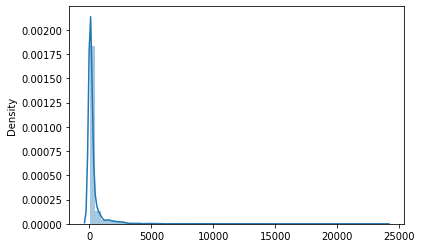

In [12]:
texts = legit['text']
data_stat(texts)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean: 86.65818759936407 std: 86.96754424794382


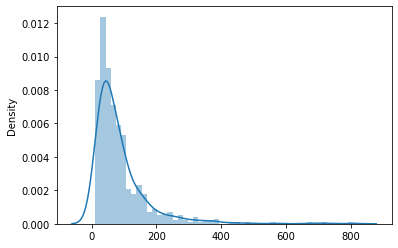

In [13]:
texts = phish['text']
data_stat(texts)

Sentence Embedding Presentation

In [15]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Create 2 lists for X and y

In [16]:
new_X = list(df_email['text'])
y = list(df_email['label'])

Create Embedding from senetnce transformer model

In [17]:
embeddings = model.encode(new_X)

Import essential moduls for embedding visualization

In [18]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
# Skleran
from sklearn.manifold import TSNE 

In [21]:
print('Shape of X embedding: ', embeddings.shape)
Y = np.array(y)
print('Shape of y: ', Y.shape)

Shape of X embedding:  (5721, 384)
Shape of y:  (5721,)


In [19]:
# Configure t-SNE function. 
embed = TSNE(
    n_components=2, # default=2, Dimension of the embedded space.
    perplexity=10, # default=30.0, The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
    early_exaggeration=12, # default=12.0, Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. 
    learning_rate=200, # default=200.0, The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers.
    n_iter=5000, # default=1000, Maximum number of iterations for the optimization. Should be at least 250.
    n_iter_without_progress=300, # default=300, Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. 
    min_grad_norm=0.0000001, # default=1e-7, If the gradient norm is below this threshold, the optimization will be stopped.
    metric='euclidean', # default=’euclidean’, The metric to use when calculating distance between instances in a feature array.
    init='random', # {‘random’, ‘pca’} or ndarray of shape (n_samples, n_components), default=’random’. Initialization of embedding
    verbose=0, # default=0, Verbosity level.
    random_state=42, # RandomState instance or None, default=None. Determines the random number generator. Pass an int for reproducible results across multiple function calls.
    method='barnes_hut', # default=’barnes_hut’. By default the gradient calculation algorithm uses Barnes-Hut approximation running in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. 
    angle=0.5, # default=0.5, Only used if method=’barnes_hut’ This is the trade-off between speed and accuracy for Barnes-Hut T-SNE.
    n_jobs=-1, # default=None
)

# Transform X
X_transformed = embed.fit_transform(embeddings)

# Print results
print('New Shape of X: ', embeddings.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)

New Shape of X:  (5721, 384)
Kullback-Leibler divergence after optimization:  1.4241595268249512
No. of iterations:  4999


In [22]:
df = pd.DataFrame(dict(X1=X_transformed[:,0], X2=X_transformed[:,1], label=Y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


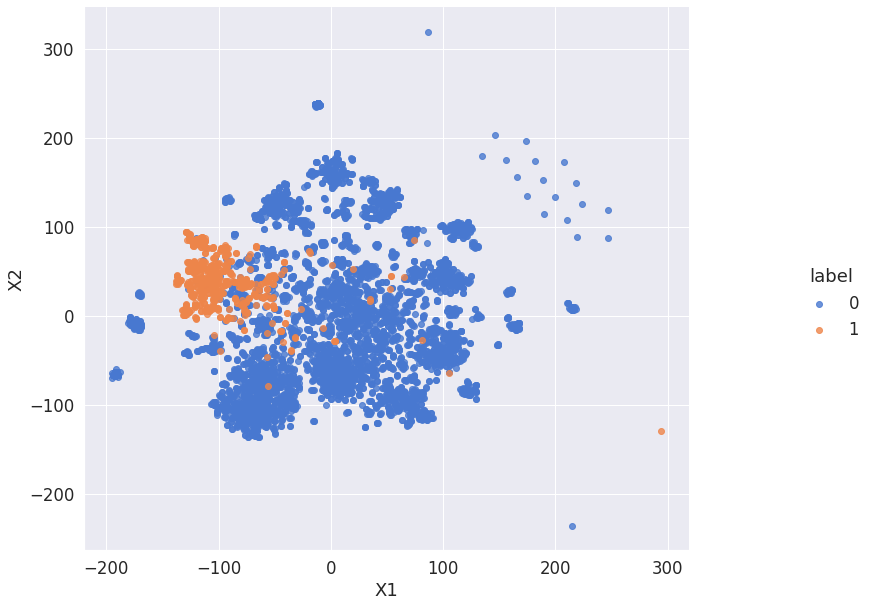

In [23]:
import seaborn as sns
sns.lmplot('X1', 'X2', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

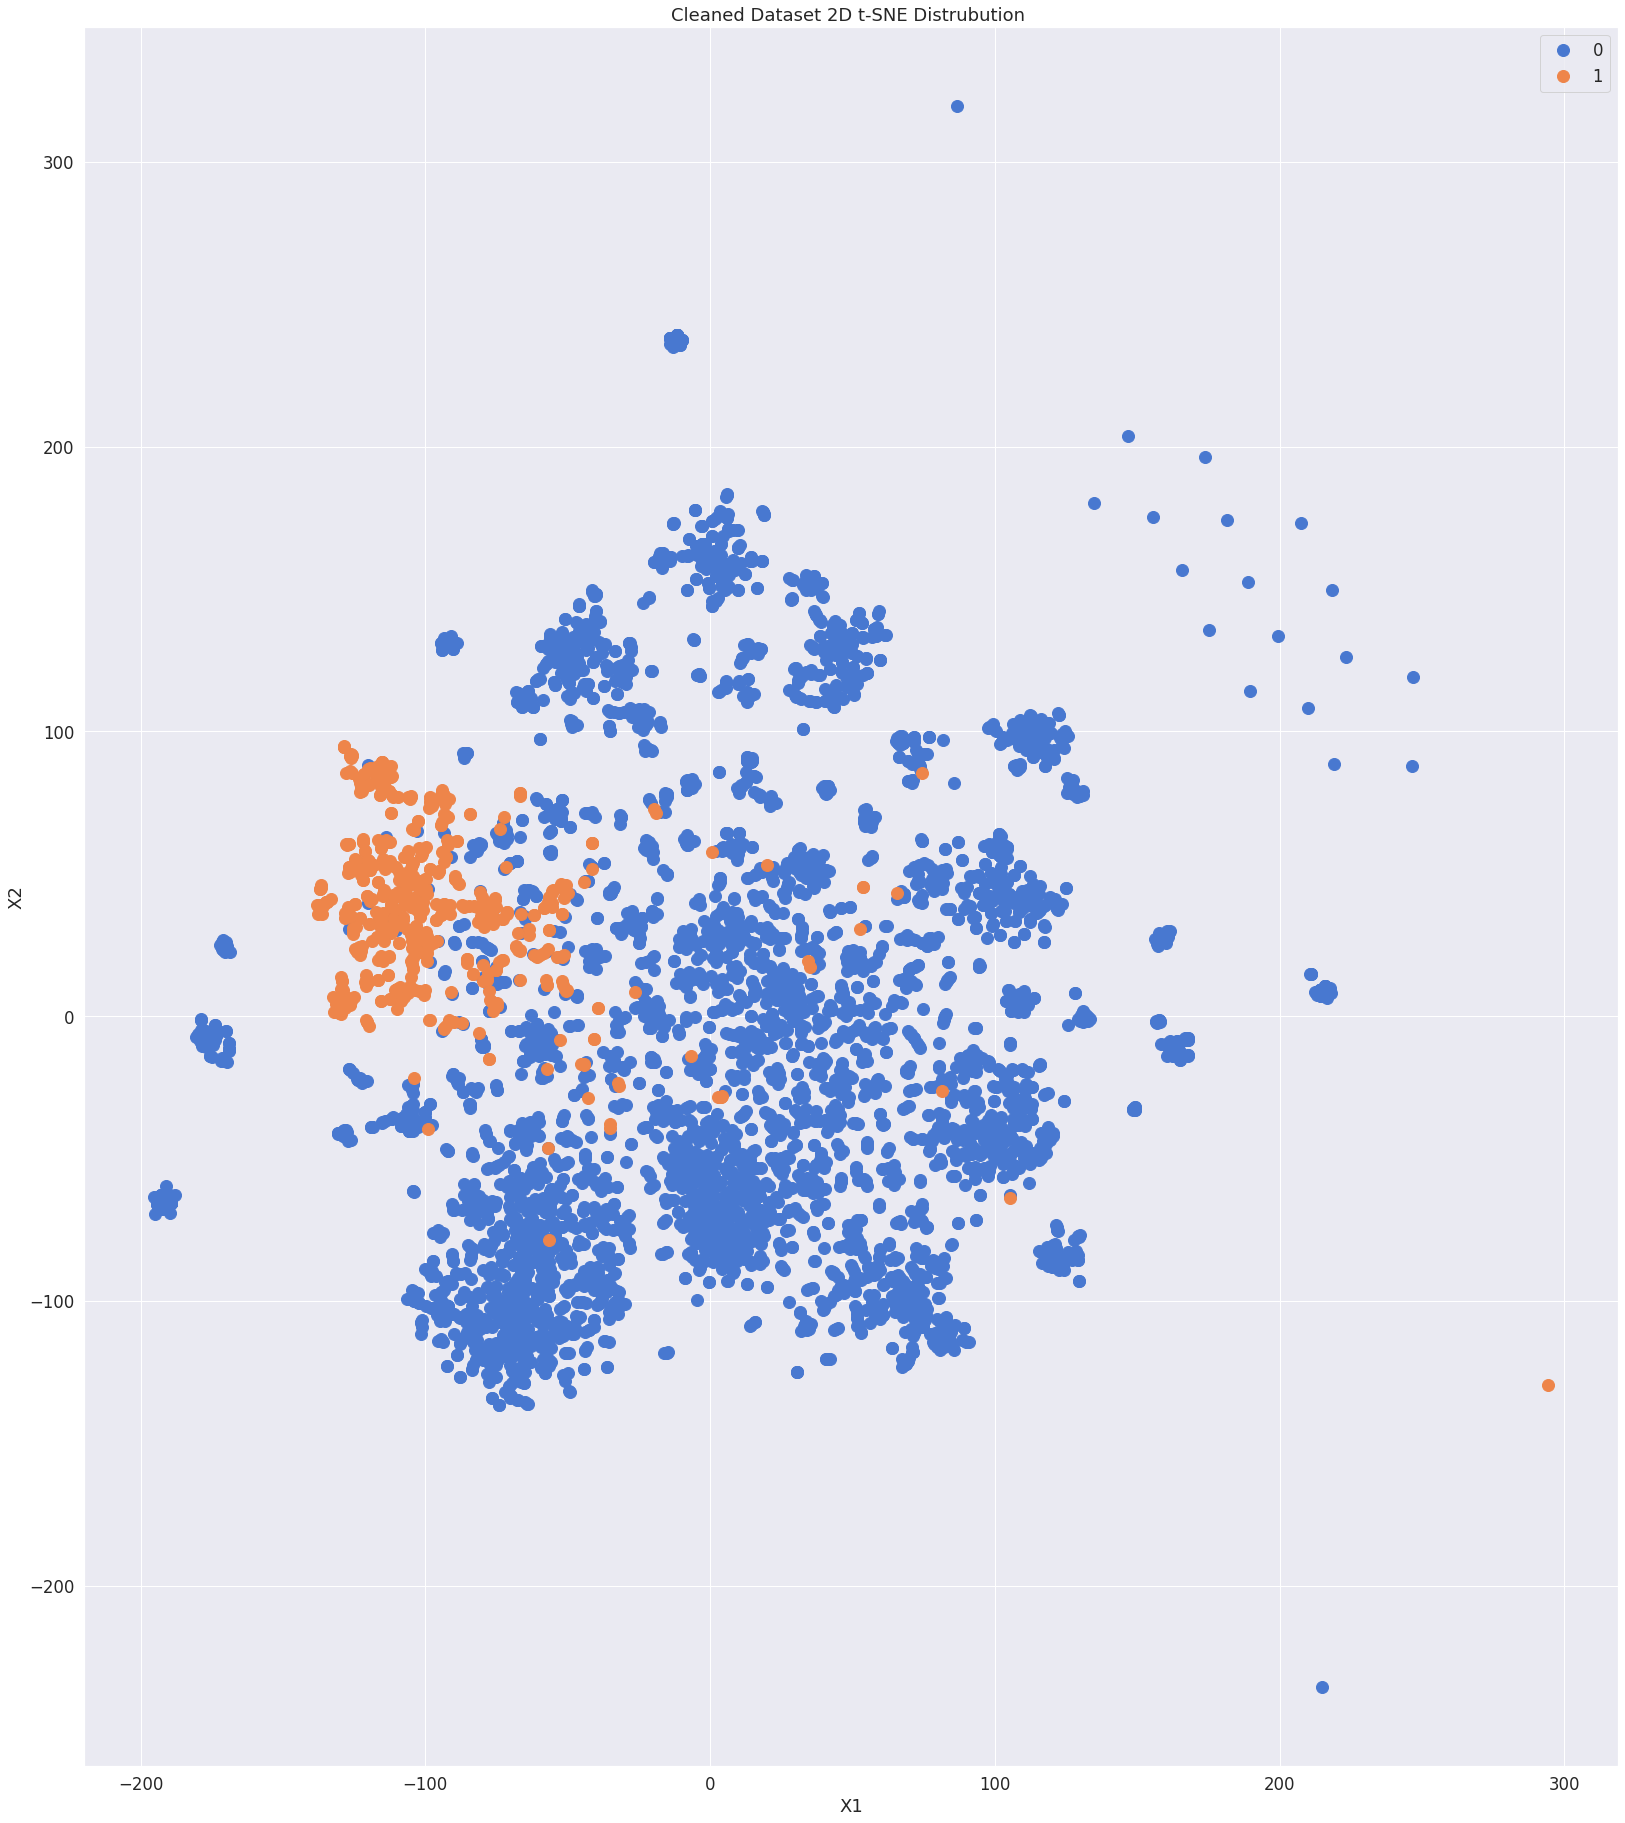

In [24]:
groups = df.groupby('label')
palette = np.array(sns.color_palette("hls", 2))

# Plot
f = plt.figure(figsize=(32, 32))
ax = plt.subplot(aspect='equal')

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X1, group.X2, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Cleaned Dataset 2D t-SNE Distrubution ")

plt.show()

Cleaned Email stat and visualization

In [39]:
df_email = pd.read_csv('/content/gdrive/MyDrive/Cleaned_IWSPA18.csv')

In [26]:
phish = df_email.loc[df_email['label'] == 1]
legit = df_email.loc[df_email['label'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean: 231.5844550586192 std: 490.2970075269468


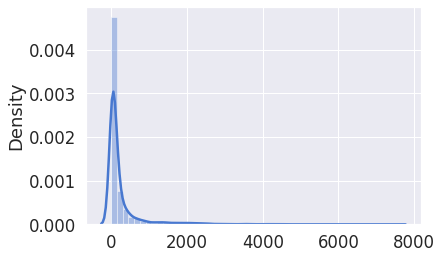

In [27]:
texts = legit['text']
data_stat(texts)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean: 71.28521126760563 std: 70.5673661232661


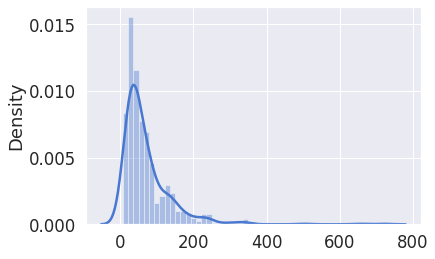

In [28]:
texts = phish['text']
data_stat(texts)

Shape of X embedding:  (5174, 384)
Shape of y:  (5174,)
New Shape of X:  (5174, 384)
Kullback-Leibler divergence after optimization:  1.4501962661743164
No. of iterations:  4999


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


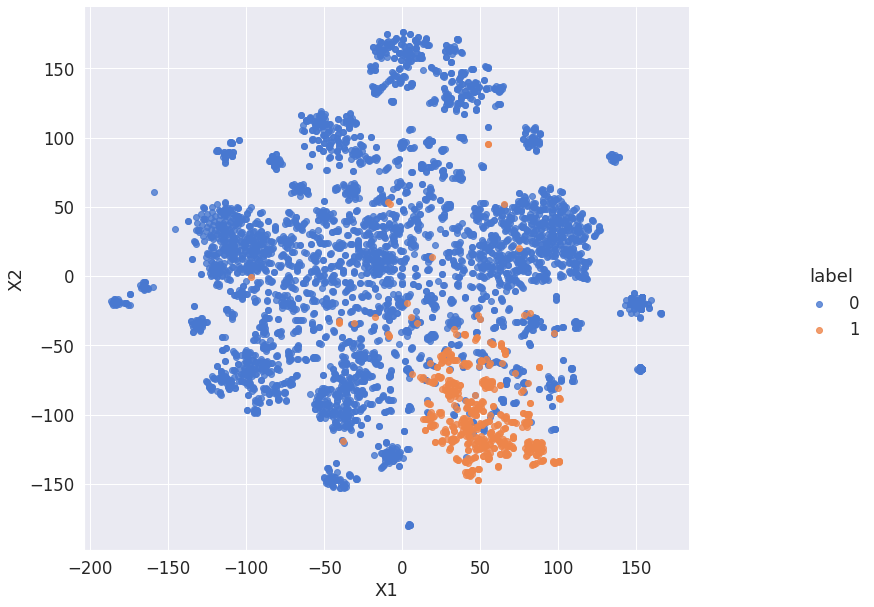

In [40]:
new_X = list(df_email['text'])
y = list(df_email['label'])

embeddings = model.encode(new_X)

print('Shape of X embedding: ', embeddings.shape)
Y = np.array(y)
print('Shape of y: ', Y.shape)


# Configure t-SNE function. 
embed = TSNE(
    n_components=2, # default=2, Dimension of the embedded space.
    perplexity=10, # default=30.0, The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
    early_exaggeration=12, # default=12.0, Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. 
    learning_rate=200, # default=200.0, The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers.
    n_iter=5000, # default=1000, Maximum number of iterations for the optimization. Should be at least 250.
    n_iter_without_progress=300, # default=300, Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. 
    min_grad_norm=0.0000001, # default=1e-7, If the gradient norm is below this threshold, the optimization will be stopped.
    metric='euclidean', # default=’euclidean’, The metric to use when calculating distance between instances in a feature array.
    init='random', # {‘random’, ‘pca’} or ndarray of shape (n_samples, n_components), default=’random’. Initialization of embedding
    verbose=0, # default=0, Verbosity level.
    random_state=42, # RandomState instance or None, default=None. Determines the random number generator. Pass an int for reproducible results across multiple function calls.
    method='barnes_hut', # default=’barnes_hut’. By default the gradient calculation algorithm uses Barnes-Hut approximation running in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. 
    angle=0.5, # default=0.5, Only used if method=’barnes_hut’ This is the trade-off between speed and accuracy for Barnes-Hut T-SNE.
    n_jobs=-1, # default=None
)

# Transform X
X_transformed = embed.fit_transform(embeddings)

# Print results
print('New Shape of X: ', embeddings.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)

df = pd.DataFrame(dict(X1=X_transformed[:,0], X2=X_transformed[:,1], label=Y))

sns.lmplot('X1', 'X2', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()



Augmented data embedding visualization

In [35]:
df_email = pd.read_csv('/content/gdrive/MyDrive/train_1_1.csv')

Shape of X embedding:  (8290, 384)
Shape of y:  (8290,)
New Shape of X:  (8290, 384)
Kullback-Leibler divergence after optimization:  1.8090287446975708
No. of iterations:  4999


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


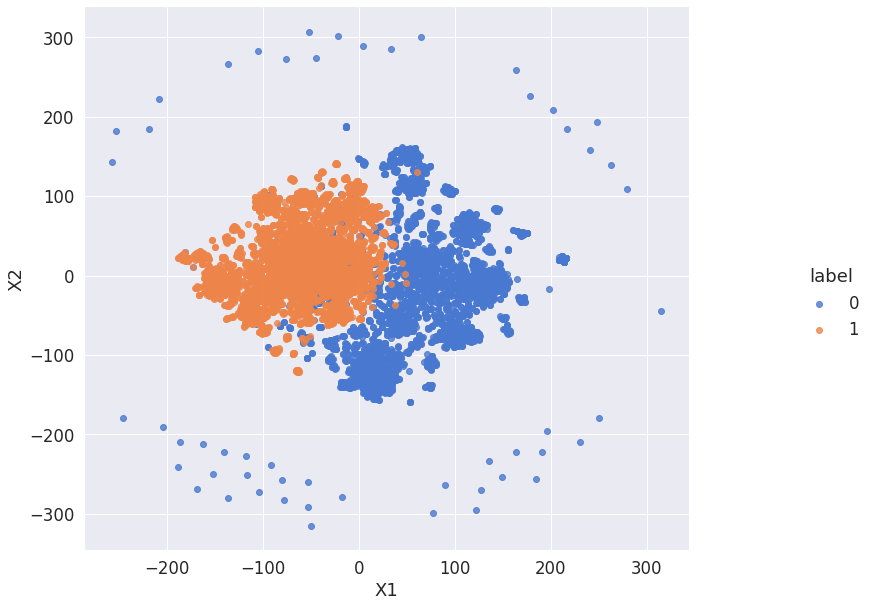

In [36]:
new_X = list(df_email['text'])
y = list(df_email['label'])

embeddings = model.encode(new_X)

print('Shape of X embedding: ', embeddings.shape)
Y = np.array(y)
print('Shape of y: ', Y.shape)


# Configure t-SNE function. 
embed = TSNE(
    n_components=2, # default=2, Dimension of the embedded space.
    perplexity=10, # default=30.0, The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
    early_exaggeration=12, # default=12.0, Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. 
    learning_rate=200, # default=200.0, The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers.
    n_iter=5000, # default=1000, Maximum number of iterations for the optimization. Should be at least 250.
    n_iter_without_progress=300, # default=300, Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. 
    min_grad_norm=0.0000001, # default=1e-7, If the gradient norm is below this threshold, the optimization will be stopped.
    metric='euclidean', # default=’euclidean’, The metric to use when calculating distance between instances in a feature array.
    init='random', # {‘random’, ‘pca’} or ndarray of shape (n_samples, n_components), default=’random’. Initialization of embedding
    verbose=0, # default=0, Verbosity level.
    random_state=42, # RandomState instance or None, default=None. Determines the random number generator. Pass an int for reproducible results across multiple function calls.
    method='barnes_hut', # default=’barnes_hut’. By default the gradient calculation algorithm uses Barnes-Hut approximation running in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. 
    angle=0.5, # default=0.5, Only used if method=’barnes_hut’ This is the trade-off between speed and accuracy for Barnes-Hut T-SNE.
    n_jobs=-1, # default=None
)

# Transform X
X_transformed = embed.fit_transform(embeddings)

# Print results
print('New Shape of X: ', embeddings.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)

df = pd.DataFrame(dict(X1=X_transformed[:,0], X2=X_transformed[:,1], label=Y))

sns.lmplot('X1', 'X2', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

